<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/beta_multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import factorial
import numpy as np
from scipy.stats import beta

from matplotlib.pyplot import plot, fill_between
from IPython import display


In [2]:
def comb(n,k):
  return factorial(n)/(factorial(k) * factorial(n-k))

In [12]:
def normalize(probabilities):
  total = sum(probabilities)
  return [p / total for p in probabilities]

In [3]:
def binomial_p(n,k):
  def distribution(single_trial_p):
    return comb(n, k) * single_trial_p**k * (1-single_trial_p)**(n-k)

  return distribution

In [4]:
num_points = 200
trial_ps = [p/num_points for p in range(0,num_points+1, 1)]

# Discrete hack first

In [33]:
doomed  = binomial_p(200, 10)  # 200 try, 10 succeed
lucky = binomial_p(100, 90)  # ninety percent success rate

doomed_probs = normalize([doomed(p) for p in trial_ps])
lucky_probs = normalize([lucky(p) for p in trial_ps])
product_probs = normalize([doomed_p*lucky_p for doomed_p, lucky_p in zip(doomed_probs, lucky_probs)])

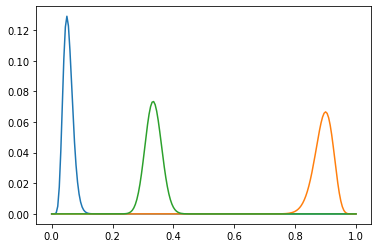

In [34]:
plot(trial_ps, doomed_probs)
plot(trial_ps, lucky_probs) 
plot(trial_ps, product_probs)